In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.random_projection import GaussianRandomProjection
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.mixture import GaussianMixture #For GMM clustering
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from keras import regularizers
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import metrics
plt.style.use('ggplot')
from matplotlib import style
%matplotlib inline

Using TensorFlow backend.


In [2]:
!pip install mlxtend

In [3]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
X, y = df.iloc[:, 1:len(df.columns)], df.iloc[:,0]
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [6]:
X = pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
X_train.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
2294,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4937,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3876,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1540,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
6575,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0


In [8]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
#sns.pairplot(df[['cap-shape','cap-surface','cap-color','bruises','odor','gill-spacing','gill-size','gill-color','class']],hue='class')

# Task 1 - K means

In [10]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

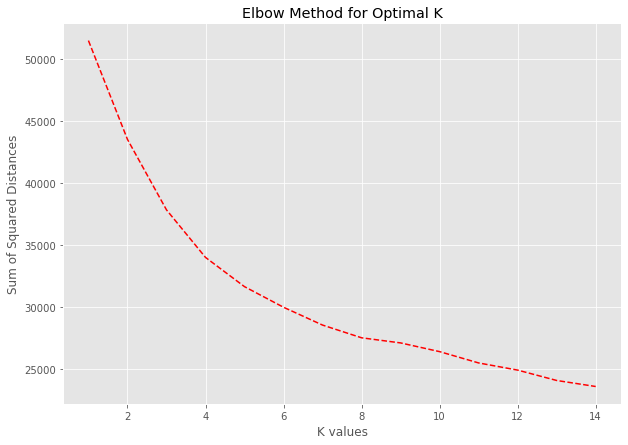

In [11]:
plt.figure(figsize=(10,7))
plt.title("Elbow Method for Optimal K")
plt.xlabel("K values")
plt.ylabel("Sum of Squared Distances")
plt.plot(K, Sum_of_squared_distances, color = 'red', linestyle = 'dashed')


In [12]:
model_k = KMeans(n_clusters=4, random_state=101)
model_k.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [13]:
# Validation prediction
prediction_v = model_k.predict(X_train)
prediction_k = model_k.predict(X_test)


10.787530762920426
[[ 12 749   0 513]
 [529 251 384   0]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.02      0.01      0.01      1274
           1       0.25      0.22      0.23      1164
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.11      2438
   macro avg       0.07      0.06      0.06      2438
weighted avg       0.13      0.11      0.12      2438

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


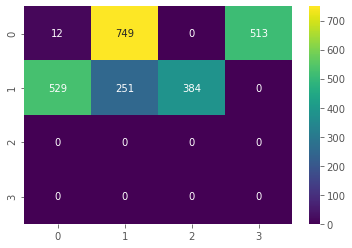

In [14]:
print((accuracy_score(y_test, prediction_k))*100)
print(confusion_matrix(y_test,prediction_k))
print(classification_report(y_test,prediction_k))

print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction_k)),annot=True,fmt="g",cmap='viridis'))


16.65494196271544
[[  35    0 1219 1680]
 [1275  912    0  565]
 [   0    0    0    0]
 [   0    0    0    0]]
              precision    recall  f1-score   support

           0       0.03      0.01      0.02      2934
           1       1.00      0.33      0.50      2752
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.17      5686
   macro avg       0.26      0.09      0.13      5686
weighted avg       0.50      0.17      0.25      5686



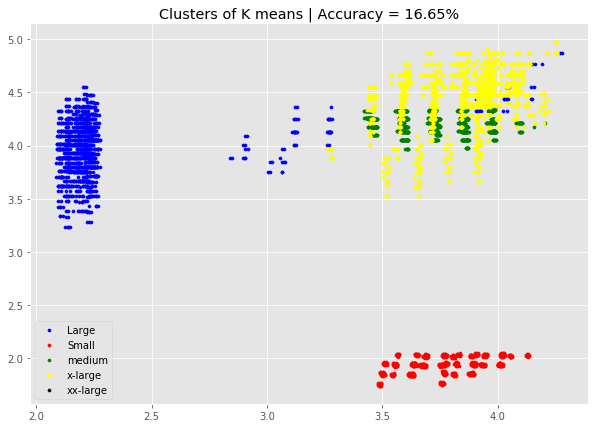

In [15]:
scaler = StandardScaler() 
kmeans_plot = KMeans(n_clusters=4,random_state=0)

X = kmeans_plot.fit_transform(X_train)
kmeans_plot.fit(X_train)
y_kmeans_2 = kmeans_plot.fit_predict(X_train)

acc= round(100*(accuracy_score(y_train,y_kmeans_2)),2)

print((accuracy_score(y_train,y_kmeans_2))*100)
print(confusion_matrix(y_train,y_kmeans_2))
print(classification_report(y_train,y_kmeans_2))

# Visualising the clusters
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 10, c = 'blue', label = 'Large')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 10, c = 'red', label = 'Small')
plt.scatter(X[y_kmeans_2 == 2, 0], X[y_kmeans_2 == 2, 1], s = 10, c = 'green', label = 'medium')
plt.scatter(X[y_kmeans_2 == 3, 0], X[y_kmeans_2 == 3, 1], s = 10, c = 'yellow', label = 'x-large')
plt.scatter(X[y_kmeans_2 == 4, 0], X[y_kmeans_2 == 4, 1], s = 10, c = 'black', label = 'xx-large')
plt.title("Clusters of K means | Accuracy = {}%".format(acc))
plt.xlabel('')
plt.ylabel("")
plt.legend()


In [16]:
X

array([[3.98674264, 4.05102747, 2.12866369, 3.18049834],
       [3.75949618, 1.92703272, 4.10051557, 3.81477925],
       [3.71784362, 4.32970551, 3.34145708, 2.78097689],
       ...,
       [3.90451814, 1.93554898, 4.07512954, 3.98959973],
       [4.05753405, 2.01764993, 4.27908126, 4.06453804],
       [3.74851555, 4.76839364, 3.69550021, 2.82633605]])

# GMM

[[2934    0]
 [1840  912]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      2934
           1       1.00      0.33      0.50      2752

    accuracy                           0.68      5686
   macro avg       0.81      0.67      0.63      5686
weighted avg       0.80      0.68      0.63      5686

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


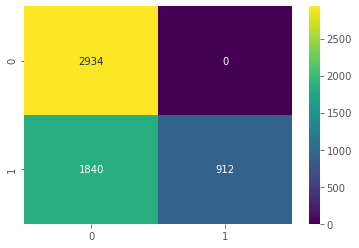

In [17]:
Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(X_train)
predictions = Gaussian.predict(X_train)
probs = Gaussian.predict_proba(X_train)
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))

print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_train,predictions)),annot=True,fmt="g",cmap='viridis'))


In [18]:
acc= round(100*accuracy_score(y_train,predictions),2)
print(acc)

67.64


68.05
[[1274    0]
 [ 779  385]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1274
           1       1.00      0.33      0.50      1164

    accuracy                           0.68      2438
   macro avg       0.81      0.67      0.63      2438
weighted avg       0.80      0.68      0.64      2438

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


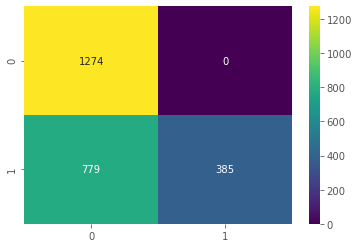

In [19]:
def GMM_def(X_train, n = 2):
    Gaussian1 = GaussianMixture(n_components=n,random_state=10)
    Gaussian1.fit(X_test)
    predictions1 = Gaussian1.predict(X_test)
    probs = Gaussian.predict_proba(X_test)
    print(round(100*accuracy_score(y_test,predictions1),2))
    print(confusion_matrix(y_test,predictions1))
    print(classification_report(y_test,predictions1))

    print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions1)),annot=True,fmt="g",cmap='viridis'))


GMM_def(X_test)

# Task - 2

In [20]:
estimator = ExtraTreesClassifier(n_estimators = 100)
featureSelection = SelectFromModel(estimator)
featureSelection.fit(X_train, y_train)
selectedFeatures = featureSelection.transform(X_train)
selectedFeatures

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [21]:
X_train.columns[featureSelection.get_support()]

Index(['bruises_1', 'odor_1', 'odor_2', 'odor_5', 'odor_6', 'gill-spacing_1',
       'gill-size_1', 'stalk-shape_1', 'stalk-root_1', 'stalk-root_2',
       'stalk-root_3', 'stalk-surface-above-ring_1',
       'stalk-surface-above-ring_2', 'stalk-surface-below-ring_1',
       'stalk-surface-below-ring_2', 'ring-type_2', 'ring-type_4',
       'spore-print-color_1', 'spore-print-color_3', 'spore-print-color_5',
       'spore-print-color_7', 'population_4', 'habitat_1'],
      dtype='object')

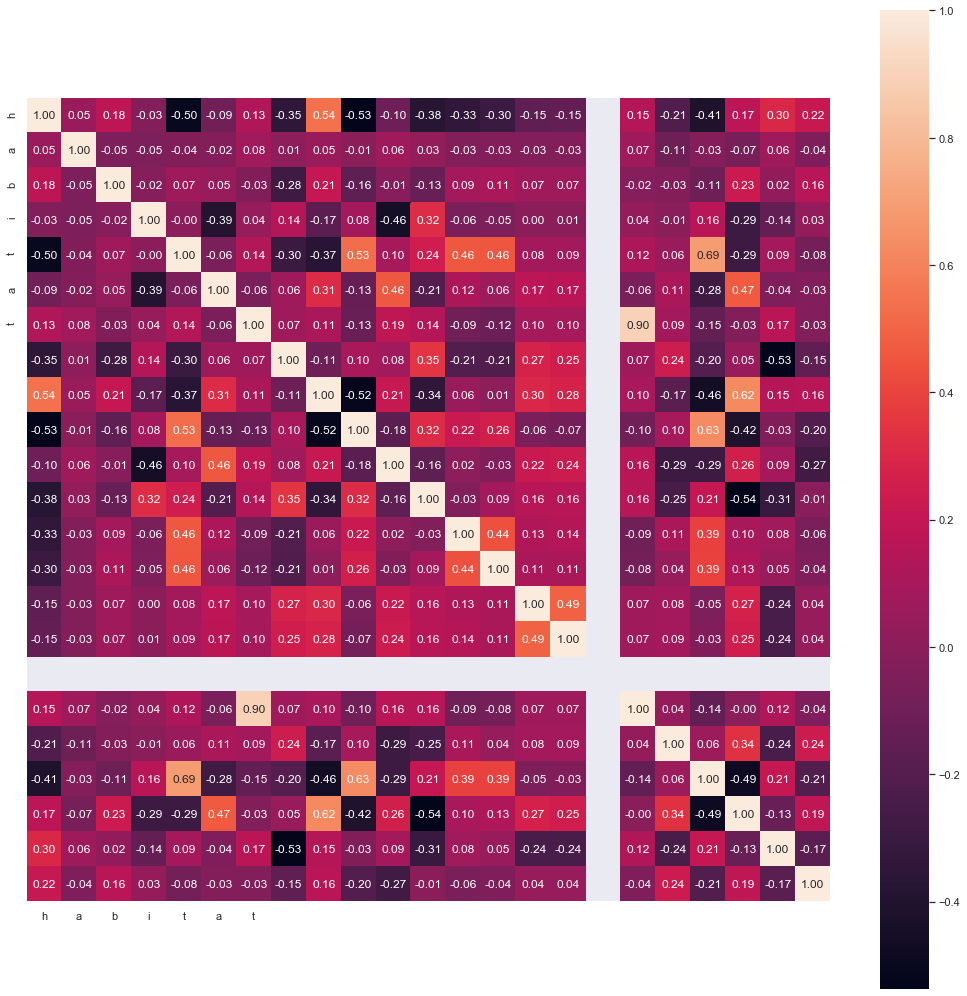

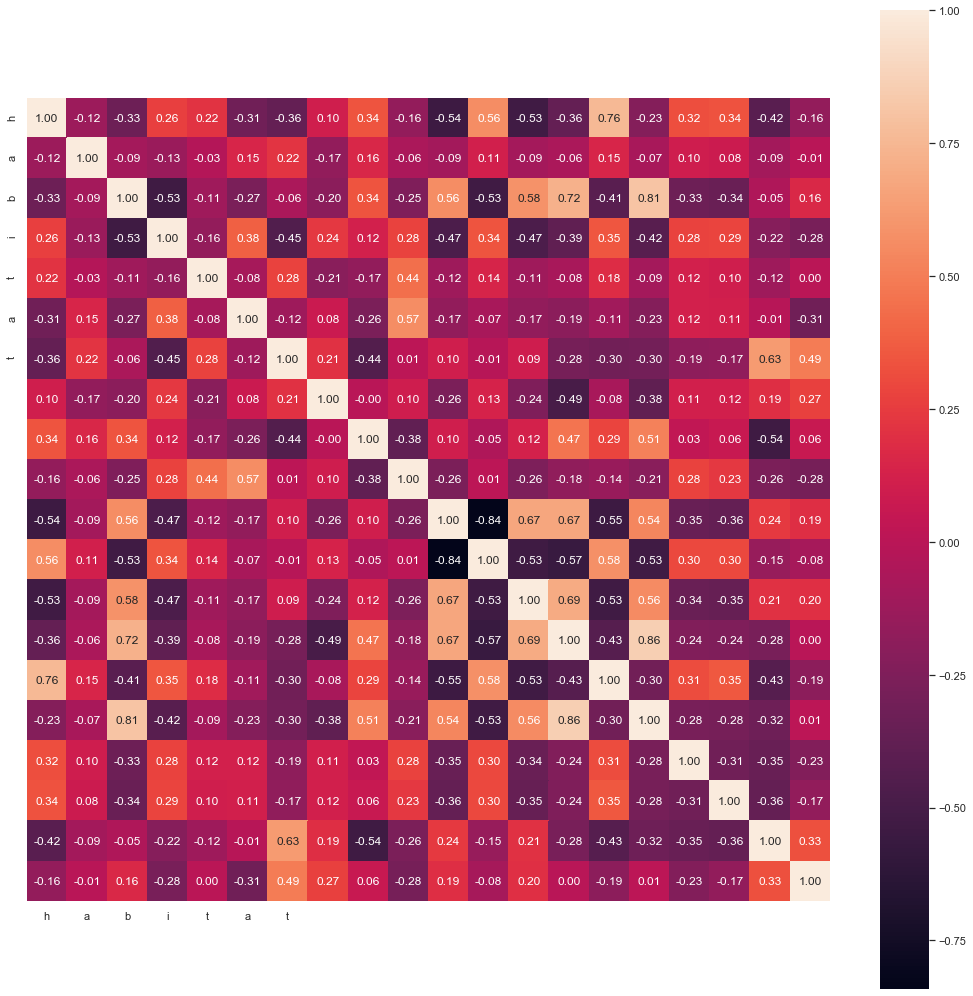

In [22]:
#print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(selectedFeatures,featureSelection.get_support())),annot=True,fmt="g",cmap='viridis'))
#Ploting correlation matrix

feature_selected_X_te = X_test.loc[:,['bruises_1', 'odor_1', 'odor_2', 'odor_5', 'odor_6', 'gill-spacing_1',
       'gill-size_1', 'stalk-shape_1', 'stalk-root_1', 'stalk-root_3',
       'stalk-surface-above-ring_1', 'stalk-surface-above-ring_2',
       'stalk-surface-below-ring_1', 'ring-type_2', 'ring-type_4',
       'spore-print-color_1', 'spore-print-color_2', 'spore-print-color_3',
       'spore-print-color_7', 'population_4']]
corr = df.corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

corr = feature_selected_X_te.corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();





# Based on these results from feature selection lets use above features and check the accuracy

In [23]:
feature_selected_X_train = X_train.loc[:,['bruises_1', 'odor_1', 'odor_2', 'odor_5', 'odor_6', 'gill-spacing_1',
       'gill-size_1', 'stalk-shape_1', 'stalk-root_1', 'stalk-root_3',
       'stalk-surface-above-ring_1', 'stalk-surface-above-ring_2',
       'stalk-surface-below-ring_1', 'ring-type_2', 'ring-type_4',
       'spore-print-color_1', 'spore-print-color_2', 'spore-print-color_3',
       'spore-print-color_7', 'population_4']]

In [24]:
feature_selected_X_train.head()

,bruises_1,odor_1,odor_2,odor_5,odor_6,gill-spacing_1,gill-size_1,stalk-shape_1,stalk-root_1,stalk-root_3,stalk-surface-above-ring_1,stalk-surface-above-ring_2,stalk-surface-below-ring_1,ring-type_2,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_7,population_4
2294,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
4937,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1
3876,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0
1540,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
6575,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1


In [25]:
feature_selected_X_test = X_test.loc[:,['bruises_1', 'odor_1', 'odor_2', 'odor_5', 'odor_6', 'gill-spacing_1',
       'gill-size_1', 'stalk-shape_1', 'stalk-root_1', 'stalk-root_3',
       'stalk-surface-above-ring_1', 'stalk-surface-above-ring_2',
       'stalk-surface-below-ring_1', 'ring-type_2', 'ring-type_4',
       'spore-print-color_1', 'spore-print-color_2', 'spore-print-color_3',
       'spore-print-color_7', 'population_4']]

In [26]:
model_feature = KMeans(n_clusters=4, random_state=101)
model_feature.fit(feature_selected_X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

28.772423496306722
              precision    recall  f1-score   support

           0       0.84      0.45      0.58      2934
           1       0.17      0.12      0.14      2752
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.29      5686
   macro avg       0.25      0.14      0.18      5686
weighted avg       0.52      0.29      0.37      5686

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


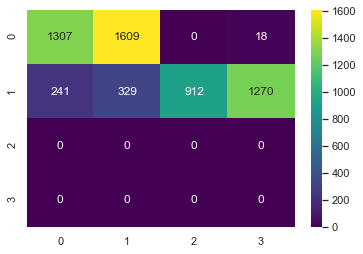

In [27]:
# VALIDATION
prediction_feature_valid = model_feature.predict(feature_selected_X_train)
valid_feature = accuracy_score(y_train, prediction_feature_valid)
print((accuracy_score(y_train, prediction_feature_valid))*100)
print(classification_report(y_train, prediction_feature_valid))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_feature_valid)),annot=True,fmt="g",cmap='viridis'))



28.055783429040197
              precision    recall  f1-score   support

           0       0.82      0.43      0.57      1274
           1       0.16      0.12      0.13      1164
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.28      2438
   macro avg       0.24      0.14      0.17      2438
weighted avg       0.50      0.28      0.36      2438

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


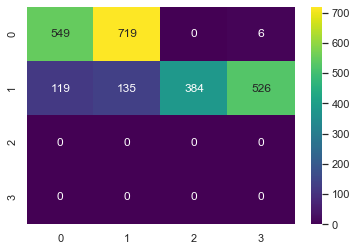

In [28]:
# TEST RESULTS
prediction_feature_test = model_feature.predict(feature_selected_X_test)
test_feature = accuracy_score(y_test, prediction_feature_test)
print((accuracy_score(y_test, prediction_feature_test))*100)
print(classification_report(y_test, prediction_feature_test))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction_feature_test)),annot=True,fmt="g",cmap='viridis'))


32.53605346465002
[[1609 1307   18    0]
 [ 329  241 1270  912]
 [   0    0    0    0]
 [   0    0    0    0]]
              precision    recall  f1-score   support

           0       0.83      0.55      0.66      2934
           1       0.16      0.09      0.11      2752
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.33      5686
   macro avg       0.25      0.16      0.19      5686
weighted avg       0.50      0.33      0.40      5686



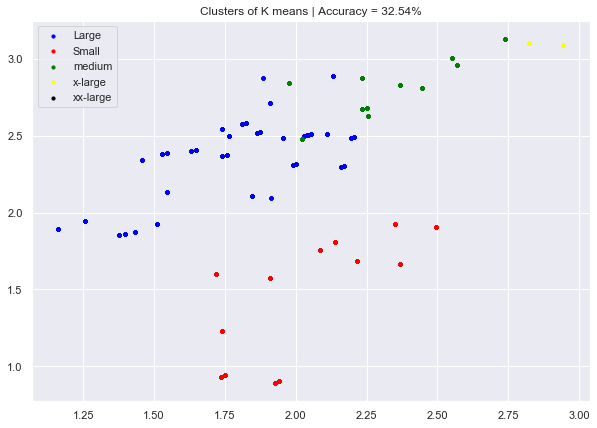

In [29]:
kmeans_plot = KMeans(n_clusters=4,random_state=0)

X = kmeans_plot.fit_transform(feature_selected_X_train)
kmeans_plot.fit(feature_selected_X_train)
y_kmeans_2 = kmeans_plot.fit_predict(feature_selected_X_train)

acc= round(100*(accuracy_score(y_train,y_kmeans_2)),2)

print((accuracy_score(y_train,y_kmeans_2))*100)
print(confusion_matrix(y_train,y_kmeans_2))
print(classification_report(y_train,y_kmeans_2))

# Visualising the clusters
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 10, c = 'blue', label = 'Large')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 10, c = 'red', label = 'Small')
plt.scatter(X[y_kmeans_2 == 2, 0], X[y_kmeans_2 == 2, 1], s = 10, c = 'green', label = 'medium')
plt.scatter(X[y_kmeans_2 == 3, 0], X[y_kmeans_2 == 3, 1], s = 10, c = 'yellow', label = 'x-large')
plt.scatter(X[y_kmeans_2 == 4, 0], X[y_kmeans_2 == 4, 1], s = 10, c = 'black', label = 'xx-large')
plt.title("Clusters of K means |After featue selection%")
plt.xlabel('')
plt.ylabel("")
plt.legend()


## Expectation maximization after feature selection

[[ 244 2690]
 [2182  570]]
              precision    recall  f1-score   support

           0       0.10      0.08      0.09      2934
           1       0.17      0.21      0.19      2752

    accuracy                           0.14      5686
   macro avg       0.14      0.15      0.14      5686
weighted avg       0.14      0.14      0.14      5686

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


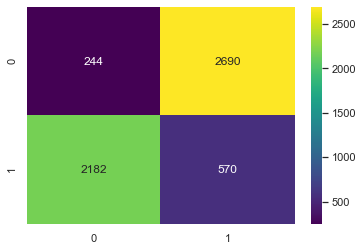

In [30]:
GaussianFS = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
GaussianFS.fit(feature_selected_X_train)
predictionsFS = GaussianFS.predict(feature_selected_X_train)
probsFS = GaussianFS.predict_proba(feature_selected_X_train)
print(confusion_matrix(y_train,predictionsFS))
print(classification_report(y_train,predictionsFS))

print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_train,predictionsFS)),annot=True,fmt="g",cmap='viridis'))


In [31]:
acc= round(100*accuracy_score(y_train,predictions),2)
print(acc)


67.64


14.56
[[ 101 1173]
 [ 910  254]]
              precision    recall  f1-score   support

           0       0.10      0.08      0.09      1274
           1       0.18      0.22      0.20      1164

    accuracy                           0.15      2438
   macro avg       0.14      0.15      0.14      2438
weighted avg       0.14      0.15      0.14      2438

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


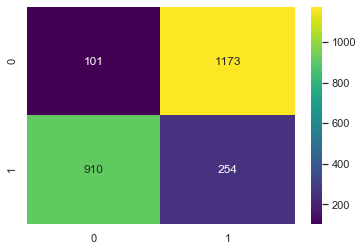

In [32]:
def GMM_def(X_train, n = 2):
    Gaussian1FS = GaussianMixture(n_components=n,random_state=10)
    Gaussian1FS.fit(feature_selected_X_test)
    predictions1FS = Gaussian1FS.predict(feature_selected_X_test)
    probsFS = GaussianFS.predict_proba(feature_selected_X_test)
    print(round(100*accuracy_score(y_test,predictions1FS),2))
    print(confusion_matrix(y_test,predictions1FS))
    print(classification_report(y_test,predictions1FS))

    print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions1FS)),annot=True,fmt="g",cmap='viridis'))


GMM_def(feature_selected_X_test)

# PCA = 85

In [33]:
pca = PCA(n_components=85)

pca_X_train = pd.DataFrame(pca.fit_transform(X_train))
pca_X_test = pd.DataFrame(pca.transform(X_test))

# PCA = 2

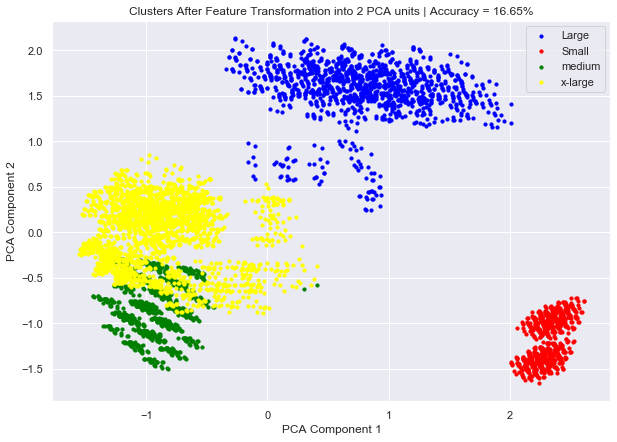

In [34]:
kmeans_plot = KMeans(n_clusters=4,random_state=0)

pca_2 = PCA(n_components=4)

X = pca_2.fit_transform(X_train)

kmeans_plot.fit(X_train)
y_kmeans_2 = kmeans_plot.fit_predict(X_train)

acc= round(100*(accuracy_score(y_train,y_kmeans_2)),2)

# Visualising the clusters
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 10, c = 'blue', label = 'Large')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 10, c = 'red', label = 'Small')
plt.scatter(X[y_kmeans_2 == 2, 0], X[y_kmeans_2 == 2, 1], s = 10, c = 'green', label = 'medium')
plt.scatter(X[y_kmeans_2 == 3, 0], X[y_kmeans_2 == 3, 1], s = 10, c = 'yellow', label = 'x-large')
#plt.scatter(X[y_kmeans_2 == 4, 0], X[y_kmeans_2 == 4, 1], s = 10, c = 'black', label = 'xx-large')
plt.title("Clusters After Feature Transformation into 2 PCA units | Accuracy = {}%".format(acc))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.savefig("ClusterSeperation.png")

35.10376362996834
              precision    recall  f1-score   support

           0       1.00      0.25      0.39      2934
           1       0.97      0.46      0.63      2752
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.35      5686
   macro avg       0.39      0.14      0.20      5686
weighted avg       0.99      0.35      0.51      5686

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


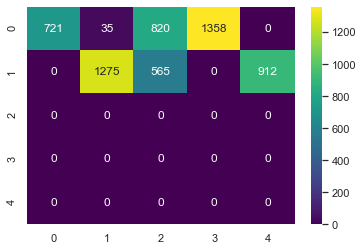

In [35]:
model_pca = KMeans(n_clusters=5, random_state=100)
model_pca.fit(pca_X_train)
# VALIDATION
prediction_pca_valid = model_pca.predict(pca_X_train)
valid_pca = accuracy_score(y_train, prediction_pca_valid)
print(accuracy_score(y_train, prediction_pca_valid)*100)
print(classification_report(y_train, prediction_pca_valid))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_pca_valid)),annot=True,fmt="g",cmap='viridis'))



35.438884331419196
              precision    recall  f1-score   support

           0       1.00      0.26      0.42      1274
           1       0.98      0.45      0.62      1164
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.35      2438
   macro avg       0.40      0.14      0.21      2438
weighted avg       0.99      0.35      0.51      2438

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


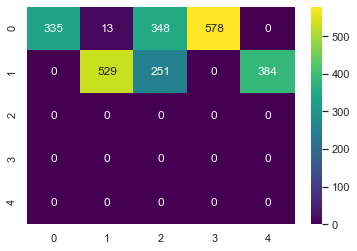

In [36]:
# TEST RESULTS
prediction_pca_test = model_pca.predict(pca_X_test)
test_pca = accuracy_score(y_test, prediction_pca_test)
print(accuracy_score(y_test, prediction_pca_test)*100)
print(classification_report(y_test, prediction_pca_test))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction_pca_test)),annot=True,fmt="g",cmap='viridis'))


In [37]:
## PCA Expectation maximization
#gmm_acc = GMM_def(pca_X_train, 2)
#print(gmm_acc)
Gaussian1FS = GaussianMixture(n_components=2,random_state=10)
Gaussian1FS.fit(pca_X_train)
predictions1FS = Gaussian1FS.predict(pca_X_train)
#probsFS = GaussianFS.predict_proba(pca_X_train)
print(round(100*accuracy_score(y_train,predictions1FS),2))
print(confusion_matrix(y_train,predictions1FS))
print(classification_report(y_train,predictions1FS))




67.64
[[2934    0]
 [1840  912]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      2934
           1       1.00      0.33      0.50      2752

    accuracy                           0.68      5686
   macro avg       0.81      0.67      0.63      5686
weighted avg       0.80      0.68      0.63      5686



In [38]:
Gaussian1FS = GaussianMixture(n_components=2,random_state=10)
Gaussian1FS.fit(pca_X_test)
predictions1FS = Gaussian1FS.predict(pca_X_test)
#probsFS = GaussianFS.predict_proba(pca_X_test)
print(round(100*accuracy_score(y_test,predictions1FS),2))
print(confusion_matrix(y_test,predictions1FS))
print(classification_report(y_test,predictions1FS))


68.05
[[1274    0]
 [ 779  385]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1274
           1       1.00      0.33      0.50      1164

    accuracy                           0.68      2438
   macro avg       0.81      0.67      0.63      2438
weighted avg       0.80      0.68      0.64      2438



# Behavior of K-Means by runnning it few times

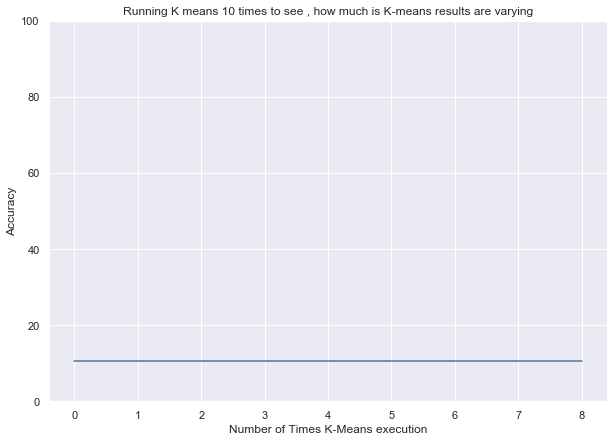

In [39]:
acc_k = []
for i in range(1,10):

    kmeans_multi = KMeans(n_clusters=4,random_state=101)
    kmeans_multi.fit(pca_X_train)

    predictions_multi = kmeans_multi.predict(pca_X_train)
    acc1= round(100*accuracy_score(y_train,predictions_multi),2)

    acc_k.append(acc1)
    
plt.figure(figsize=(10,7))
plt.plot(acc_k)
plt.ylabel("Accuracy")
plt.title("Running K means 10 times to see , how much is K-means results are varying")
plt.xlabel("Number of Times K-Means execution")
plt.ylim(0,100)
plt.show()

## ICA

In [40]:
ica = FastICA(n_components=85)

ica_X_train = pd.DataFrame(ica.fit_transform(X_train))
ica_X_test = pd.DataFrame(ica.transform(X_test))

32.48329229686951
              precision    recall  f1-score   support

           0       0.55      0.52      0.54      2934
           1       1.00      0.12      0.21      2752
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.32      5686
   macro avg       0.39      0.16      0.19      5686
weighted avg       0.77      0.32      0.38      5686

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


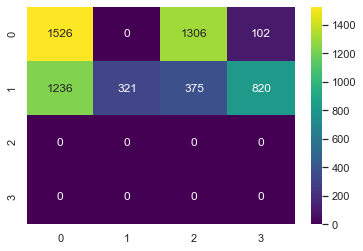

In [41]:
model_ica = KMeans(n_clusters=4, random_state=100)
model_ica.fit(ica_X_train)
# VALIDATION
prediction_ica_valid = model_ica.predict(ica_X_train)
valid_ica = accuracy_score(y_train, prediction_ica_valid)
print(accuracy_score(y_train, prediction_ica_valid)*100)
print(classification_report(y_train, prediction_ica_valid))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_ica_valid)),annot=True,fmt="g",cmap='viridis'))


31.542247744052503
              precision    recall  f1-score   support

           0       0.55      0.52      0.53      1274
           1       1.00      0.10      0.17      1164
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.32      2438
   macro avg       0.39      0.15      0.18      2438
weighted avg       0.76      0.32      0.36      2438

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


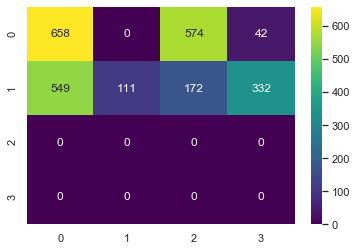

In [42]:
# TEST RESULTS
prediction_ica_test = model_ica.predict(ica_X_test)
test_ica = accuracy_score(y_test, prediction_ica_test)
print(accuracy_score(y_test, prediction_ica_test)*100)
print(classification_report(y_test, prediction_ica_test))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction_ica_test)),annot=True,fmt="g",cmap='viridis'))


In [43]:
#ica_acc = GMM_def(ica_X_train,2)
#print(ica_acc)
Gaussian1FS = GaussianMixture(n_components=2,random_state=10)
Gaussian1FS.fit(ica_X_train)
predictions1FS = Gaussian1FS.predict(ica_X_train)
#probsFS = GaussianFS.predict_proba(pca_X_test)
print(round(100*accuracy_score(y_train,predictions1FS),2))
print(confusion_matrix(y_train,predictions1FS))
print(classification_report(y_train,predictions1FS))


78.98
[[2660  274]
 [ 921 1831]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      2934
           1       0.87      0.67      0.75      2752

    accuracy                           0.79      5686
   macro avg       0.81      0.79      0.79      5686
weighted avg       0.80      0.79      0.79      5686



In [44]:
#ica_acc = GMM_def(ica_X_train,2)
#print(ica_acc)
Gaussian1FS = GaussianMixture(n_components=2,random_state=10)
Gaussian1FS.fit(ica_X_test)
predictions1FS = Gaussian1FS.predict(ica_X_test)
#probsFS = GaussianFS.predict_proba(pca_X_test)
print(round(100*accuracy_score(y_test,predictions1FS),2))
print(confusion_matrix(y_test,predictions1FS))
print(classification_report(y_test,predictions1FS))


63.21
[[970 304]
 [593 571]]
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1274
           1       0.65      0.49      0.56      1164

    accuracy                           0.63      2438
   macro avg       0.64      0.63      0.62      2438
weighted avg       0.64      0.63      0.62      2438



## Randomized projection

In [45]:
grp = GaussianRandomProjection(n_components=85, eps=0.1, random_state=420)
rca_X_train = pd.DataFrame(grp.fit_transform(X_train))
rca_X_test = pd.DataFrame(grp.transform(X_test))

45.28666901160746
              precision    recall  f1-score   support

           0       0.99      0.45      0.62      2934
           1       0.97      0.46      0.62      2752
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.45      5686
   macro avg       0.49      0.23      0.31      5686
weighted avg       0.98      0.45      0.62      5686

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


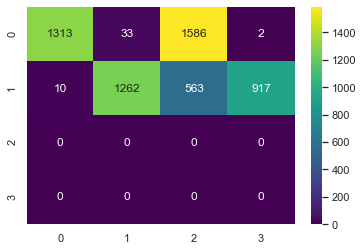

In [46]:
model_rca = KMeans(n_clusters=4, random_state=99)
model_rca.fit(rca_X_train)
# VALIDATION
prediction_rca_valid = model_rca.predict(rca_X_train)
valid_rca = accuracy_score(y_train, prediction_rca_valid)
print(accuracy_score(y_train, prediction_rca_valid)*100)
print(classification_report(y_train, prediction_rca_valid))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_rca_valid)),annot=True,fmt="g",cmap='viridis'))



44.503691550451194
              precision    recall  f1-score   support

           0       0.99      0.44      0.61      1274
           1       0.98      0.45      0.61      1164
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.45      2438
   macro avg       0.49      0.22      0.31      2438
weighted avg       0.99      0.45      0.61      2438

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


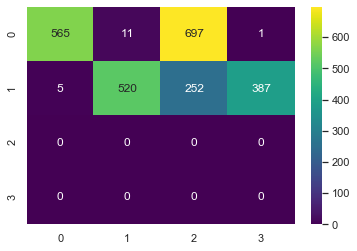

In [47]:
# TEST RESULTS
prediction_rca_test = model_rca.predict(rca_X_test)
test_rca = accuracy_score(y_test, prediction_rca_test)
print(accuracy_score(y_test, prediction_rca_test)*100)
print(classification_report(y_test, prediction_rca_test))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction_rca_test)),annot=True,fmt="g",cmap='viridis'))

In [48]:
#rca_acc = GMM_def(rca_X_train,2)
#print(rca_acc)

Gaussian1FS = GaussianMixture(n_components=2,random_state=10)
Gaussian1FS.fit(rca_X_train)
predictions1FS = Gaussian1FS.predict(rca_X_train)
#probsFS = GaussianFS.predict_proba(pca_X_test)
print(round(100*accuracy_score(y_train,predictions1FS),2))
print(confusion_matrix(y_train,predictions1FS))
print(classification_report(y_train,predictions1FS))


11.54
[[  91 2843]
 [2187  565]]
              precision    recall  f1-score   support

           0       0.04      0.03      0.03      2934
           1       0.17      0.21      0.18      2752

    accuracy                           0.12      5686
   macro avg       0.10      0.12      0.11      5686
weighted avg       0.10      0.12      0.11      5686



In [49]:
#ica_acc = GMM_def(ica_X_train,2)
#print(ica_acc)
Gaussian1FS = GaussianMixture(n_components=2,random_state=10)
Gaussian1FS.fit(rca_X_test)
predictions1FS = Gaussian1FS.predict(rca_X_test)
#probsFS = GaussianFS.predict_proba(pca_X_test)
print(round(100*accuracy_score(y_test,predictions1FS),2))
print(confusion_matrix(y_test,predictions1FS))
print(classification_report(y_test,predictions1FS))


10.83
[[  13 1261]
 [ 913  251]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01      1274
           1       0.17      0.22      0.19      1164

    accuracy                           0.11      2438
   macro avg       0.09      0.11      0.10      2438
weighted avg       0.09      0.11      0.10      2438



In [50]:
validation_scores = [valid_feature, valid_pca, valid_ica, valid_rca]
test_scores = [test_feature, test_pca, test_ica, test_rca]

In [51]:
test_scores

[0.280557834290402,
 0.35438884331419196,
 0.31542247744052504,
 0.4450369155045119]

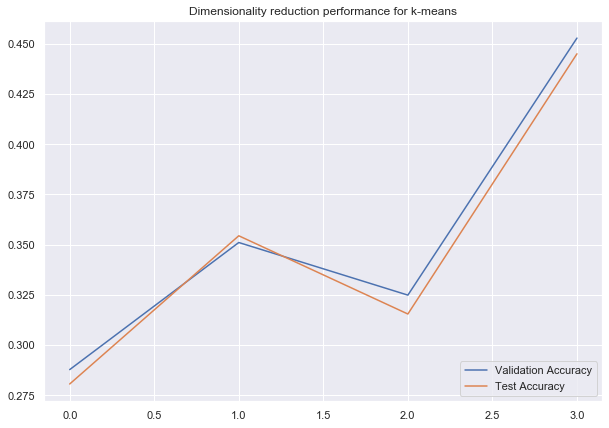

In [52]:
plt.figure(figsize=(10,7))
plt.title("Dimensionality reduction performance for k-means")
#plt.xticks('Feature','ICA','PCA','RCA')
plt.plot(validation_scores, label = 'Validation Accuracy')
plt.plot(test_scores, label="Test Accuracy")
plt.legend(loc = "lower right")

## Neural network

In [53]:
classifier = Sequential()

classifier.add(Dense(14, activation= 'relu', input_dim =85))
classifier.add(Dense(7, activation= 'tanh'))
classifier.add(Dense(5, activation= 'tanh'))
classifier.add(Dense(1, activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(rca_X_train, y_train, batch_size = 10, epochs = 10, validation_data=(rca_X_test,y_test))

Train on 5686 samples, validate on 2438 samples
Epoch 1/10
5686/5686 [==============================] - 3s 531us/step - loss: 0.1794 - accuracy: 0.9465 - val_loss: 0.0343 - val_accuracy: 0.9975
Epoch 2/10
5686/5686 [==============================] - 2s 390us/step - loss: 0.0219 - accuracy: 0.9979 - val_loss: 0.0169 - val_accuracy: 0.9959
Epoch 3/10
5686/5686 [==============================] - 2s 370us/step - loss: 0.0096 - accuracy: 0.9986 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 4/10
5686/5686 [==============================] - 2s 367us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 5/10
5686/5686 [==============================] - 2s 373us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/10
5686/5686 [==============================] - 2s 358us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
5686/5686 [==============================] - 2s 369us/step - loss

In [54]:
y_pred_relu = classifier.predict(rca_X_train)
y_pred_relu = y_pred_relu > 0.5
print(accuracy_score(y_train,y_pred_relu)*100)
print(classification_report(y_train,y_pred_relu))


100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2934
           1       1.00      1.00      1.00      2752

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686



100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


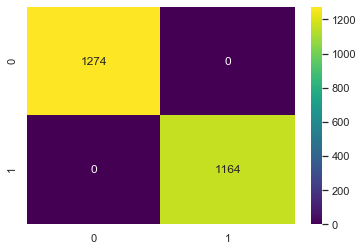

In [55]:
y_pred_relu = classifier.predict(rca_X_test)
y_pred_relu = y_pred_relu > 0.5
print(accuracy_score(y_test,y_pred_relu)*100)
print(classification_report(y_test,y_pred_relu))
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_relu)),annot=True,fmt="g",cmap='viridis'))

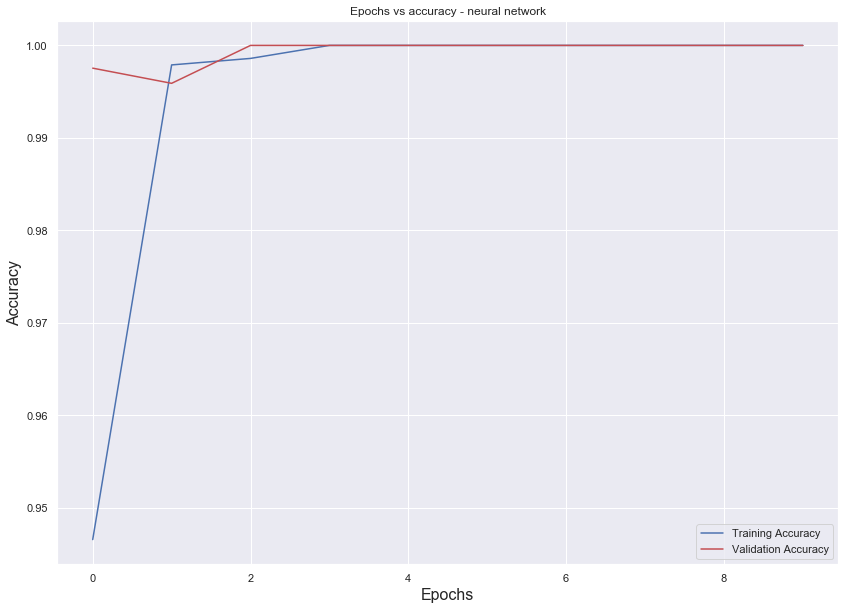

In [56]:
plt.figure(figsize=(14,10))
plt.title("Epochs vs accuracy - neural network")
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(hist.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Task 5

In [57]:
new_Df = pd.DataFrame()
data = pd.DataFrame({"KM_Pred": prediction_v,"EM_Prob": probs[:,1],"ActualOutput": y_train})
new_Df = new_Df.append(data)

new_Df.head()

,KM_Pred,EM_Prob,ActualOutput
2294,3,0.0,0
4937,2,1.0,1
3876,1,0.0,1
1540,1,0.0,1
6575,0,0.0,1


In [58]:
X_train_5 = new_Df.iloc[:, 0:2]
y_5 = new_Df.iloc[:, 2:]

In [59]:
NNclassifier = Sequential()

# Adding the input layer and the first hidden layer
NNclassifier.add(Dense(18, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the second hidden layer
NNclassifier.add(Dense(9, init = 'uniform', activation = 'relu'))

# Adding the output layer
NNclassifier.add(Dense(1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
NNclassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
NNclassifier.fit(X_train_5, y_5, batch_size = 10, nb_epoch = 10)

Epoch 1/10
5686/5686 [==============================] - 2s 377us/step - loss: 0.5765 - accuracy: 0.7707
Epoch 2/10
5686/5686 [==============================] - 1s 255us/step - loss: 0.3748 - accuracy: 0.8945
Epoch 3/10
5686/5686 [==============================] - 1s 251us/step - loss: 0.3313 - accuracy: 0.8945
Epoch 4/10
5686/5686 [==============================] - 2s 309us/step - loss: 0.3135 - accuracy: 0.8945
Epoch 5/10
5686/5686 [==============================] - 2s 304us/step - loss: 0.3051 - accuracy: 0.8945
Epoch 6/10
5686/5686 [==============================] - 2s 311us/step - loss: 0.3018 - accuracy: 0.8945
Epoch 7/10
5686/5686 [==============================] - 2s 266us/step - loss: 0.3006 - accuracy: 0.8945
Epoch 8/10
5686/5686 [==============================] - 1s 252us/step - loss: 0.2998 - accuracy: 0.8945
Epoch 9/10
5686/5686 [==============================] - 1s 260us/step - loss: 0.2996 - accuracy: 0.8945
Epoch 10/10
5686/5686 [==============================] - 1s 261u

89.4477664438973
[[2899   35]
 [ 565 2187]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2934
           1       0.98      0.79      0.88      2752

    accuracy                           0.89      5686
   macro avg       0.91      0.89      0.89      5686
weighted avg       0.91      0.89      0.89      5686

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


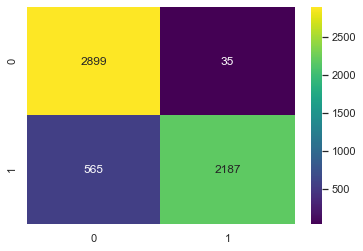

In [60]:
y_pred_5 = NNclassifier.predict(X_train_5)
y_pred_5 = y_pred_5 > 0.5
print(accuracy_score(y_5,y_pred_5)*100)
print(confusion_matrix(y_5,y_pred_5))
print(classification_report(y_5,y_pred_5))

print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_5,y_pred_5)),annot=True,fmt="g",cmap='viridis'))